In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")


In [3]:
import pandas as pd

books = pd.read_csv(f"{path}/books.csv")

In [4]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [5]:
print(f"Dimensions {{ {len(books)}, {len(books.columns)} }}")


Dimensions { 6810, 12 }


### To find the data type of each column

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


### To find the null values in the columns

In [7]:
books.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

### To get general statistics.

In [8]:
books.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


### To find the duplicates and distince attributes in the column

In [9]:
for column in books.columns:
    print(f"Column name: {column}")
    print(f"Distinct Values: {books[column].nunique()}")
    print(f"Duplicated Values: {books[column].duplicated().sum()}")
    print('-' * 30)


Column name: isbn13
Distinct Values: 6810
Duplicated Values: 0
------------------------------
Column name: isbn10
Distinct Values: 6810
Duplicated Values: 0
------------------------------
Column name: title
Distinct Values: 6398
Duplicated Values: 412
------------------------------
Column name: subtitle
Distinct Values: 2009
Duplicated Values: 4800
------------------------------
Column name: authors
Distinct Values: 3780
Duplicated Values: 3029
------------------------------
Column name: categories
Distinct Values: 567
Duplicated Values: 6242
------------------------------
Column name: thumbnail
Distinct Values: 6481
Duplicated Values: 328
------------------------------
Column name: description
Distinct Values: 6474
Duplicated Values: 335
------------------------------
Column name: published_year
Distinct Values: 94
Duplicated Values: 6715
------------------------------
Column name: average_rating
Distinct Values: 200
Duplicated Values: 6609
------------------------------
Column name: 

### To find the pattern of missing data.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

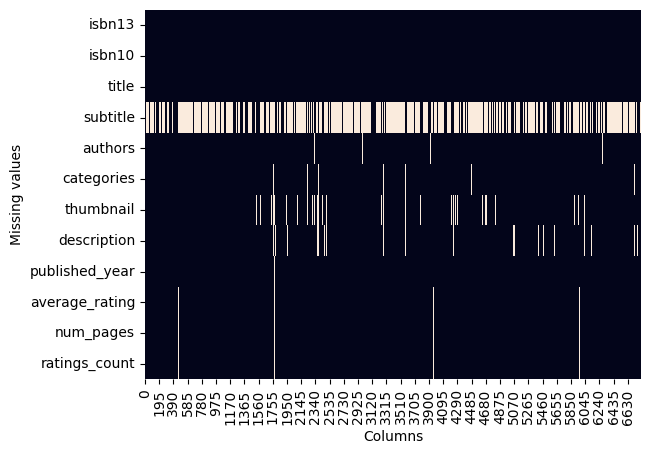

In [11]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar = False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

#### From the above heatmap we can conclude that bottom average rating, num_pages, rating_count have similar patter which can be due to from other data which is merged to this 

In [12]:
import numpy as np

books["missing_description"]=np.where(books["description"].isna(), 1, 0) # Books with description put 1 otherwise 0.
books["book_age"]=2024-books["published_year"]

In [13]:
columns_of_interest = ["num_pages", "book_age", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method="spearman") # missing_description is binary so spearman is more appropriate

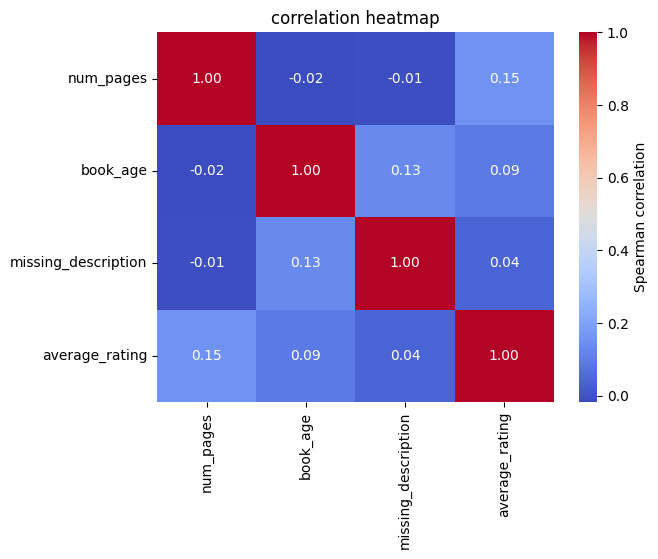

In [14]:
heatmap=sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label":"Spearman correlation"})
heatmap.set_title("correlation heatmap")
plt.show()

#### From the above correation matrix we can say missing description is not correlated with anything so we can safely remove those description.

#### To remove the missing rows

In [15]:
books_missing=books[~(books.description.isna())&
                    ~(books.num_pages.isna())&
                    ~(books.average_rating.isna())&
                    ~(books.published_year.isna())]

#### To find the famous categories

In [16]:
books_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [17]:
books_missing["words_in_description"] = books_missing["description"].str.split().str.len()
print(books_missing["words_in_description"])

0       199
1       205
2        14
3        57
4        45
       ... 
6803     63
6804    117
6805    174
6808    245
6809     20
Name: words_in_description, Length: 6507, dtype: int64


C:\Users\haris\AppData\Local\Temp\ipykernel_14020\721390451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing["words_in_description"] = books_missing["description"].str.split().str.len()


#### To get the distribution of the number of words in the description.

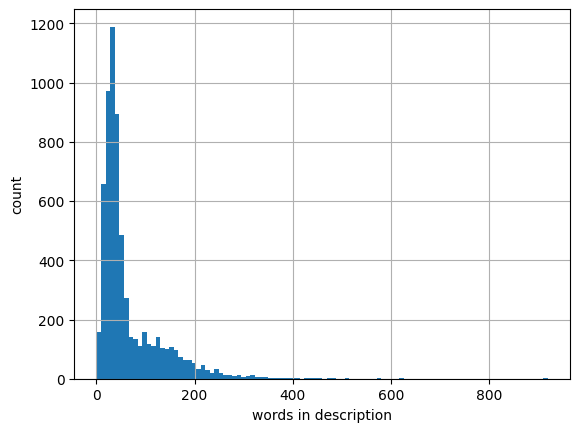

In [18]:
books_missing["words_in_description"].hist(bins=100)

plt.xlabel("words in description")
plt.ylabel("count")

plt.show()

#### Words are evenly distributed

In [19]:
pd.set_option('display.max_colwidth', None)

#### To check the short lenghted description.

In [20]:
books_missing.loc[books_missing.words_in_description.between(1,4), "description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [21]:
books_missing.loc[books_missing.words_in_description.between(5, 14), "description"]

2       Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.
38                                     Koko is Peter Straub's foray into the psychological horror of the Vietnam War.
70                                                             A matter of life and death - and the Throne of England
77                                                                                     Nonsense rhyming story. 4 yrs+
84                                                  A study guide for the novel There's a Boy in the Girl's bathroom.
                                                            ...                                                      
6715                         The first comprehensive guide to addressing Native American issues in teaching children.
6726                                                                   Presents two complete novels from Henry James.
6757                                                    

In [22]:
books_missing.loc[books_missing.words_in_description.between(15, 24), "description"]

10                                                          One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.
32                                                                                Tells the story of three generations of Chinese women, beginning at the turn of the century.
36                                 A magical and fantastic collection of early stories by one of the most original children's authors of the 20th century. For 8-11 year olds.
57                                                          A young drifter finds more than he bargained for when he agrees to deliver a parcel to an English country house...
68                                        A new 'The Doors of Perception' for the 21st century? A visionary journey from cynicism to shamanism by a brilliant young US writer.
                                                                                         ...                                 

In [23]:
books_missing.loc[books_missing.words_in_description.between(25, 34), "description"]

9                                                     Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth birthday celebrations there are ghosts of absent friends and absent enemies.
14                                               Available in the U.S. for the first time, this is the second volume in the exceptional Legends of the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.
20                             It is 1937, and Charles Ashworth, a Canon to the Archbishop of Canterbury, is sent to untangle a web of self-delusion and corruption at the episcopal palace of the charismatic Bishop of Starbridge.
21                          Reissue of the author's most famous and well-loved work, the Starbridge series, six self-contained yet interconnected novels that explore the history of the Church of England through the 20th century.
46                                                               No one believes a l

#### From 25 words mark the description makes sense so we will remove the words under 25

In [24]:
books_missing_under_25 = books_missing[books_missing["words_in_description"] >= 25]

In [25]:
len(books_missing_under_25)

5197

#### Since the subtitle column contains lot of null value but some book title will not be unique without a title and subtitle we will combine the both subtitle and title

In [26]:
books_missing_under_25["title_and_subtitle"] = (
    np.where(books_missing_under_25["subtitle"].isna(), books_missing_under_25["title"],
            books_missing_under_25[["title","subtitle"]].astype(str).agg(": ".join, axis=1)))

C:\Users\haris\AppData\Local\Temp\ipykernel_14020\1962494769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_under_25["title_and_subtitle"] = (


#### Combine a unique id with the description here ISBN is used

In [27]:
books_missing_under_25["tagged_description"] = books_missing_under_25[["isbn13", "description"]].astype(str).agg(" ".join,axis=1)

C:\Users\haris\AppData\Local\Temp\ipykernel_14020\1055578913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_under_25["tagged_description"] = books_missing_under_25[["isbn13", "description"]].astype(str).agg(" ".join,axis=1)


In [28]:
pd.reset_option('display.max_colwidth')

In [29]:
books_missing_under_25.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."


#### Finally remove unwanted column and save to csv

In [32]:
books_missing_under_25.drop(["subtitle", "missing_description", "book_age", "words_in_description"], axis=1).to_csv("../data/cleaned-books.csv", index=False)